## Problem 1

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt

In [185]:
incomes = np.loadtxt("incomes.txt")
incomes

array([ 51253.49715631, 100630.32024137,  83009.27613739,  82882.10654304,
        77338.29483892,  81071.64131675,  84760.04353269,  74599.0967193 ,
        94687.36110452,  76720.48678222,  84669.65776296,  79707.04914362,
       100026.64050846,  89828.42639587,  74006.05604302, 103281.1855776 ,
        88586.79236711, 133631.92813961,  91519.53047238, 106863.33198279,
        89622.32208316,  63803.24097245,  99116.670934  , 135865.02679613,
        61344.18577082,  99182.27630779,  55038.04861413,  71353.56078829,
        90880.19896459,  80950.37075039,  84724.93806271,  91236.88284731,
        91628.21297882, 105243.4671147 ,  71500.93550933,  56162.05440841,
        78935.2939267 ,  81097.09361259, 130354.71406191, 112159.02216504,
        82259.96409801,  75699.52604273,  71699.30209176,  93487.89133203,
       120723.60773086, 113045.98795795,  70752.04409433, 103679.41128338,
        62517.62724779,  70780.7133676 , 112840.45723451,  65532.50301185,
        69456.26059752,  

### (a)

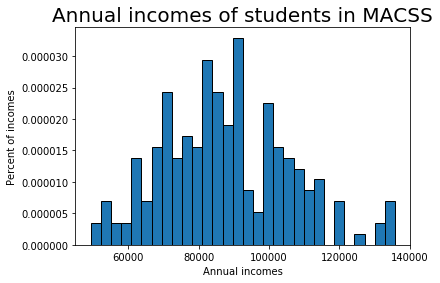

In [186]:
num_bins = 30
count, bins, ignored = plt.hist(incomes, num_bins, normed=True, edgecolor='k')
plt.title('Annual incomes of students in MACSS', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.show()

### (b)

In [187]:
# Define function that generates values of a lognormal pdf
def trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s = sigma, scale = np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, s = sigma, scale = np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, s = sigma, scale = np.exp(mu)) -
                       sts.lognorm.cdf(cut_lb, s = sigma, scale = np.exp(mu)))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

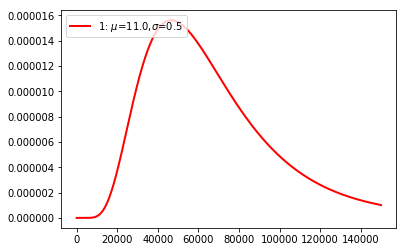

In [188]:
# Plot the lognormal PDF
dist_pts = np.linspace(1, 150000, 20000)
mu = 11.0
sigma = 0.5
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu, sigma, 0, 150000),
         linewidth=2, color='r', label='1: $\mu$=11.0,$\sigma$=0.5')
plt.legend(loc='upper left')
plt.show()

In [189]:
# Define log likelihood function for the lognormal distribution
def log_lik_trunclognorm(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_trunclognorm(incomes, mu, sigma, 0, 150000))

Log-likelihood:  -2379.120591931827


### (c)

In [190]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_trunclognorm(xvals, mu, abs(sigma), cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [191]:
mu_init = 11.0
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 0, 150000.0)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x

print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.361699976140056  sig_MLE= 0.21174326472241192


In [192]:
results_uncstr

      fun: 2240.934337511636
 hess_inv: array([[0.00032821, 0.00066662],
       [0.00066662, 0.00147221]])
      jac: array([6.10351562e-05, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 77
      nit: 12
     njev: 19
   status: 2
  success: False
        x: array([11.36169998,  0.21174326])

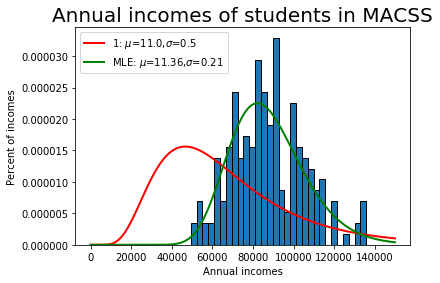

In [193]:
plt.clf()

# Plot the histogram of the data
num_bins = 30
count, bins, ignored = plt.hist(incomes, num_bins, normed=True, edgecolor='k')
plt.title('Annual incomes of students in MACSS', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')

# Plot the distributions from before
dist_pts = np.linspace(1, 150000, 20000)
mu = 11.0
sigma = 0.5
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu, sigma, 0, 150000),
         linewidth=2, color='r', label='1: $\mu$=11.0,$\sigma$=0.5')
plt.legend(loc='upper left')

# Plot the MLE estimated distribution
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 150000),
         linewidth=2, color='g', label='MLE: $\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')

plt.show()

In [194]:
print('Maximized Log-likelihood: ', log_lik_trunclognorm(incomes, mu_MLE, sig_MLE, 0, 150000))

Maximized Log-likelihood:  -2240.934337511636


In [195]:
vcv_mle = results_uncstr.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])

print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[0.00032821 0.00066662]
 [0.00066662 0.00147221]]
Standard error for mu estimate =  0.01811666067379998
Standard error for sigma estimate =  0.038369346976562184


In [196]:
print('mu percent', stderr_mu_mle/mu_MLE)
print('sig percent', stderr_sig_mle/sig_MLE)

mu percent 0.0015945378518923722
sig percent 0.18120693013240854


### (d)

In [197]:
mu_new, sig_new = np.array([11.0, 0.5])
print(mu_new, sig_new)
print(mu_MLE, sig_MLE)
log_lik_h0 = log_lik_trunclognorm(incomes, mu_new, sig_new, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_trunclognorm(incomes, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

11.0 0.5
11.361699976140056 0.21174326472241192
hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.934337511636
likelihood ratio value 276.3725088403826
chi squared of H0 with 2 degrees of freedom p-value =  0.0


### (e)

In [198]:
prob1 = 1.0 - sts.lognorm.cdf(100000, s = sig_MLE, scale = np.exp(mu_MLE))
print("The probabililty that you will earn more than $100,000 is {}".format(prob1))

The probabililty that you will earn more than $100,000 is 0.23755402258976566


In [199]:
prob2 = sts.lognorm.cdf(75000, s = sig_MLE, scale = np.exp(mu_MLE))
print("The probabililty that you will earn less than $75,000 is {}".format(prob2))

The probabililty that you will earn less than $75,000 is 0.2596439222572218


## Problem 2

### (a)

In [200]:
data = pd.read_csv("sick.txt")
data

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
5,0.62,44.67,1.20,68.60
6,1.06,27.92,1.84,29.42
7,1.29,44.87,2.40,50.49
8,1.05,53.68,1.65,55.12
9,1.18,39.63,1.96,37.30


In [201]:
sick = data['sick']
age = data['age']
children = data['children']
temp_winter = data['avgtemp_winter']

In [202]:
def log_lik(sick, age, children, temp_winter, beta_0, beta_1, beta_2, beta_3, sigma):
    epsilon = sick - beta_0 - beta_1 * age - beta_2 * children - beta_3 * temp_winter
    pdf_vals = sts.norm.pdf(epsilon, loc=0.0, scale=sigma)
    log_lik_func = np.log(pdf_vals).sum()
    
    return log_lik_func

In [203]:
def crit_lr(params, *args):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick, age, children, temp_winter = args
    neg_log_lik = -log_lik(sick, age, children, temp_winter, beta_0, beta_1, beta_2, beta_3, sigma)
    
    return neg_log_lik

In [204]:
beta_0_init = 0.1
beta_1_init = 0
beta_2_init = 0
beta_3_init = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, beta_3_init, sigma_init])
args_lr = (sick, age, children, temp_winter)
results = opt.minimize(crit_lr, params_init, args=(args_lr))
results

C:\Users\Linghui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Linghui\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Linghui\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: -876.865049106772
 hess_inv: array([[ 6.47097689e-07,  1.61328973e-08, -2.23381973e-07,
        -1.98146609e-08,  8.08693965e-09],
       [ 1.61328973e-08,  2.85675750e-09, -2.54622521e-08,
        -1.96435748e-09,  1.59106175e-10],
       [-2.23381973e-07, -2.54622521e-08,  2.71073987e-07,
         1.75971663e-08,  1.26082888e-10],
       [-1.98146609e-08, -1.96435748e-09,  1.75971663e-08,
         1.54240586e-09, -3.55268850e-10],
       [ 8.08693965e-09,  1.59106175e-10,  1.26082888e-10,
        -3.55268850e-10,  1.51183699e-08]])
      jac: array([  3.52018738, 162.95065308,   6.68073273, 159.34707642,
        -5.6547699 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 667
      nit: 38
     njev: 93
   status: 2
  success: False
        x: array([ 0.25164648,  0.01293339,  0.40050172, -0.0099917 ,  0.00301755])

In [205]:
beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sigma_MLE = results.x

print("beta_0 = {}".format(beta_0_MLE))
print("beta_1 = {}".format(beta_1_MLE))
print("beta_2 = {}".format(beta_2_MLE))
print("beta_3 = {}".format(beta_3_MLE))
print("sigma = {}".format(sigma_MLE))

beta_0 = 0.2516464764182266
beta_1 = 0.012933391379524808
beta_2 = 0.40050171807976065
beta_3 = -0.009991697128833764
sigma = 0.003017553403871654


In [206]:
print("The value of the log likelihood function is {}".format(-results.fun))

The value of the log likelihood function is 876.865049106772


In [207]:
vcv_mle = results.hess_inv

print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 6.47097689e-07  1.61328973e-08 -2.23381973e-07 -1.98146609e-08
   8.08693965e-09]
 [ 1.61328973e-08  2.85675750e-09 -2.54622521e-08 -1.96435748e-09
   1.59106175e-10]
 [-2.23381973e-07 -2.54622521e-08  2.71073987e-07  1.75971663e-08
   1.26082888e-10]
 [-1.98146609e-08 -1.96435748e-09  1.75971663e-08  1.54240586e-09
  -3.55268850e-10]
 [ 8.08693965e-09  1.59106175e-10  1.26082888e-10 -3.55268850e-10
   1.51183699e-08]]


### (b)

In [208]:
beta_0 = 1.0
sigma = 0.1
beta_1, beta_2, beta_3 = 0, 0, 0

In [209]:
log_lik_h0 = log_lik(sick, age, children, temp_winter, beta_0, beta_1, beta_2, beta_3, sigma)
print('hypothesis value log likelihood', log_lik_0)
log_lik_mle = log_lik(sick, age, children, temp_winter, beta_0_MLE, beta_1_MLE, beta_2_MLE,\
                      beta_3_MLE, sigma_MLE)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.865049106772
likelihood ratio value 6261.131474297794
chi squared of H0 with 5 degrees of freedom p-value =  0.0
